In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
# Define the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Splitting the data into training and validation sets
)
# Define the dataset path
dataset_path = r"C:\Users\GADE SUSHMA\OneDrive\Desktop\Yeshwanth\AIML\data"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [4]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=42
)

Found 3657 images belonging to 2 classes.
Found 914 images belonging to 2 classes.


In [5]:
# Define and train CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(train_generator, epochs=10, validation_data=validation_generator)

C:\Users\GADE SUSHMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


C:\Users\GADE SUSHMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.9043 - loss: 0.1974 - val_accuracy: 0.9989 - val_loss: 0.0014
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.9997 - loss: 9.2181e-04 - val_accuracy: 1.0000 - val_loss: 1.9167e-04
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 1.0000 - loss: 1.5827e-04 - val_accuracy: 1.0000 - val_loss: 5.9138e-05
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 1.0000 - loss: 5.2416e-05 - val_accuracy: 1.0000 - val_loss: 3.1100e-05
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 1.0000 - loss: 3.3189e-05 - val_accuracy: 1.0000 - val_loss: 1.8351e-05
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 1.0000 - loss: 1.7807e-05 - val_accuracy: 1.0000 - val_loss: 1.1945e-05
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 1.0000 - loss: 1.1233e-05 - val_accuracy: 1.0000 - val_loss: 8.6455e-06
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - acc

In [6]:
# Train k-Nearest Neighbors (k-NN) classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
X_train, y_train = next(train_generator)
knn_model.fit(X_train.reshape(-1, 100*100*3), y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# Train Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train.reshape(-1, 100*100*3), y_train)

SVC(gamma='auto')

In [8]:
# Train Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train.reshape(-1, 100*100*3), y_train)

LogisticRegression(max_iter=1000)

In [9]:
# Train Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train.reshape(-1, 100*100*3), y_train)

DecisionTreeClassifier()

In [10]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, y_train = next(train_generator)
rf_model.fit(X_train.reshape(-1, 100*100*3), y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Train AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train.reshape(-1, 100*100*3), y_train)

C:\Users\GADE SUSHMA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 8.2279e-06


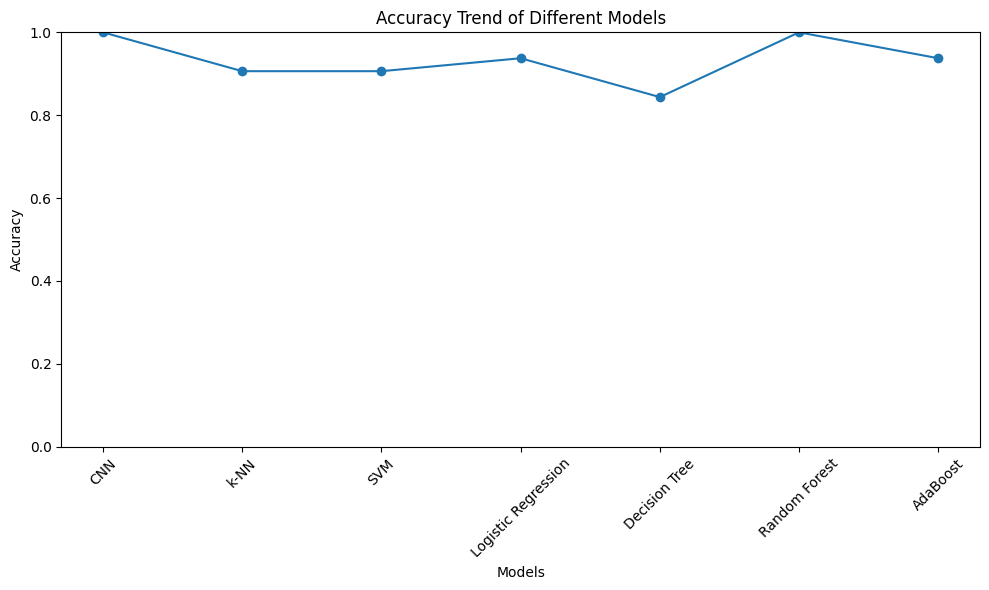

In [12]:
# Define a batch size for predictions
batch_size = 8

# Initialize lists to store model names and accuracies
model_names = []
accuracies = []

# Define your models
models = {
    "CNN": cnn_model,  # Assuming you have already defined cnn_model
    "k-NN": knn_model,
    "SVM": svm_model,
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": rf_model,
    "AdaBoost": adaboost_model
}

# Loop through the models dictionary and calculate metrics
for name, model in models.items():
    if name == "CNN":
        try:
            # Evaluate CNN model accuracy
            cnn_accuracy = cnn_model.evaluate(validation_generator)[1]
            model_names.append(name)
            accuracies.append(cnn_accuracy)
        except Exception as e:
            print(f"Error evaluating CNN model: {e}")
    else:
        predictions = []
        true_labels = []
        try:
            for _ in range(len(validation_generator)):
                X_val, y_val = next(validation_generator)
                preds = model.predict(X_val.reshape(-1, 100*100*3))
                predictions.extend(preds)
                true_labels.extend(y_val)
                if len(predictions) >= batch_size:
                    break
            predictions = np.round(predictions).astype(int)
            accuracy = accuracy_score(true_labels, predictions)
            model_names.append(name)
            accuracies.append(accuracy)
        except Exception as e:
            print(f"Error calculating accuracy for {name}: {e}")


# Plot accuracy trend for all models
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

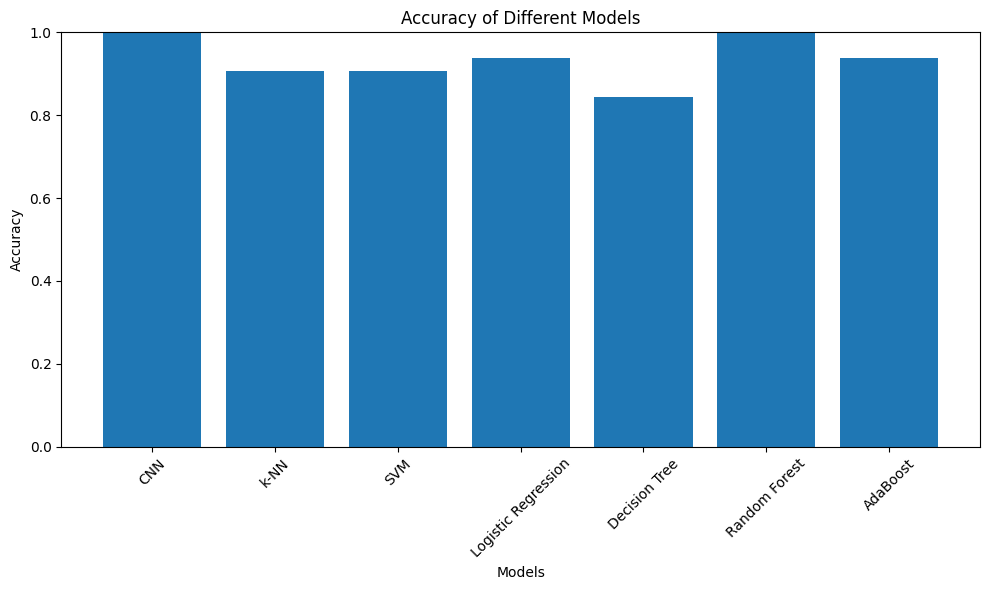

In [13]:
# Plot accuracy for all models
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
k-NN Accuracy: 0.8125
k-NN Precision: 0.7272727272727273


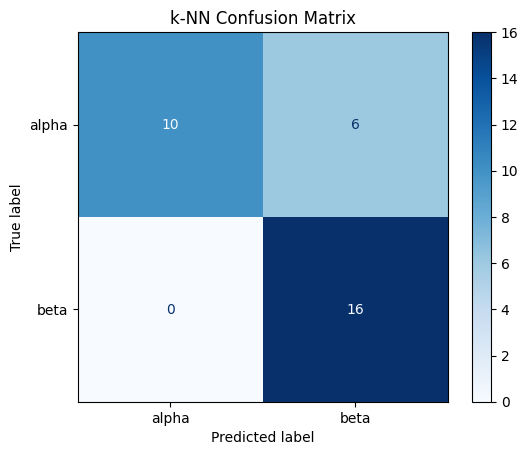

SVM Accuracy: 0.875
SVM Precision: 0.9166666666666666


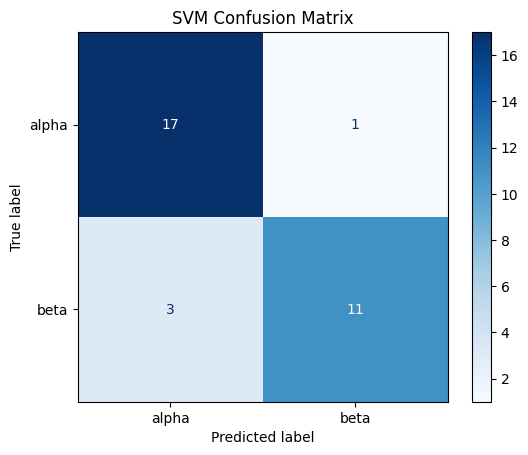

Logistic Regression Accuracy: 0.9375
Logistic Regression Precision: 0.9230769230769231


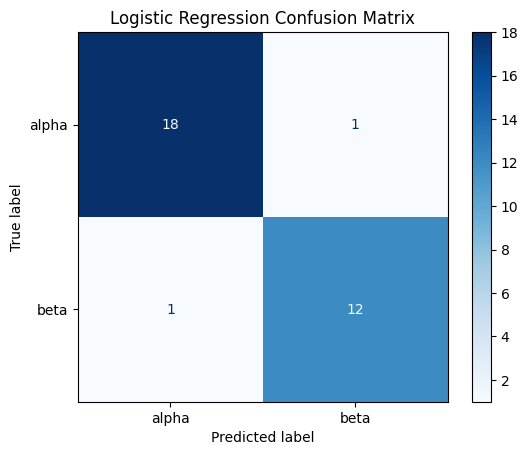

Decision Tree Accuracy: 0.8125
Decision Tree Precision: 0.6428571428571429


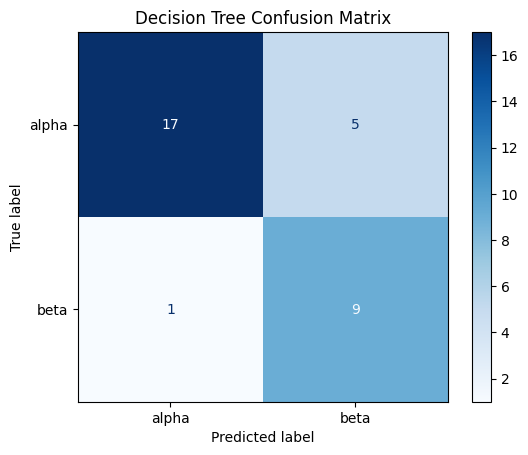

Random Forest Accuracy: 1.0
Random Forest Precision: 1.0


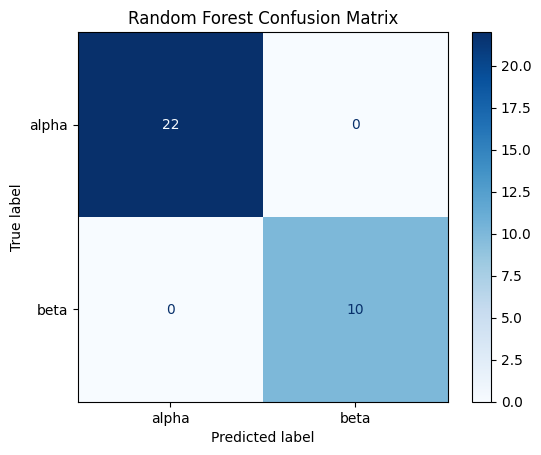

AdaBoost Accuracy: 0.90625
AdaBoost Precision: 0.8


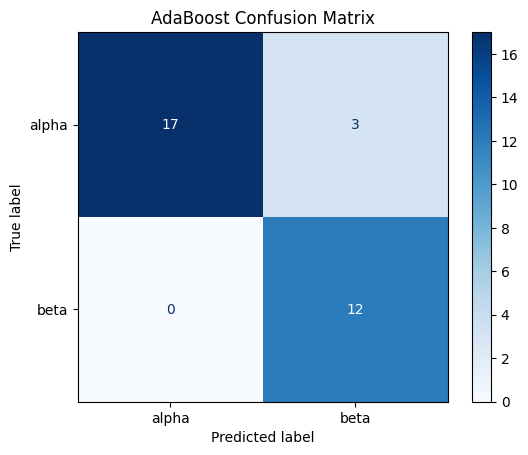

In [14]:
# Make predictions on validation data for classification models only
batch_size = 8  # Define a smaller batch size for prediction

models = {
    "CNN": cnn_model,
    "k-NN": knn_model,
    "SVM": svm_model,
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": rf_model,
    "AdaBoost": adaboost_model
}

for name, model in models.items():
    if name == "CNN":
        predictions = model.predict(validation_generator)
        predictions = (predictions > 0.5).astype(int) 
    else:
        predictions = []
        true_labels = []
        for _ in range(len(validation_generator)):
            X_val, y_val = next(validation_generator)
            preds = model.predict(X_val.reshape(-1, 100*100*3))
            predictions.extend(preds)
            true_labels.extend(y_val)
            if len(predictions) >= batch_size:
                break
        accuracy = accuracy_score(true_labels, predictions)
        precision = precision_score(true_labels, predictions)
        print(f"{name} Accuracy: {accuracy}")
        print(f"{name} Precision: {precision}")

        # Confusion Matrix
        cm = confusion_matrix(true_labels, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["alpha", "beta"])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"{name} Confusion Matrix")
        plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 3.0242e-06
CNN Accuracy: 1.0
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
CNN Precision: 0.43703703703703706


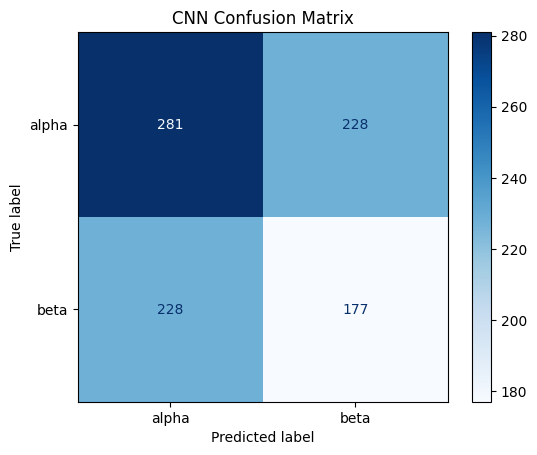

In [15]:
# Evaluate CNN model accuracy
cnn_accuracy = cnn_model.evaluate(validation_generator)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

# Generate predictions for the CNN model for the entire validation set
predictions = cnn_model.predict(validation_generator).flatten()
predictions = np.round(predictions).astype(int)  # Convert probabilities to binary predictions

# Calculate precision
from sklearn.metrics import precision_score
precision = precision_score(validation_generator.labels, predictions)
print(f"CNN Precision: {precision}")

# Generate and plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(validation_generator.labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["alpha", "beta"])
disp.plot(cmap=plt.cm.Blues)
plt.title("CNN Confusion Matrix")
plt.show()

In [16]:
# Initialize lists to store model names and classification reports
model_names = []
classification_reports = []

# Loop through the models dictionary and calculate classification reports
for name, model in models.items():
    if name == "CNN":
        try:
            # Load validation data for CNN model
            X_val, y_val = next(validation_generator)
            
            # Make predictions using the CNN model
            predictions = cnn_model.predict(X_val).flatten()
            predictions_binary = (predictions > 0.5).astype(int)
            
            # Calculate classification report
            report = classification_report(y_val, predictions_binary, target_names=["Class 0", "Class 1"])
            
            model_names.append(name)
            classification_reports.append(report)
        except Exception as e:
            print(f"Error generating classification report for {name}: {e}")
    else:
        predictions = []
        true_labels = []
        try:
            for _ in range(len(validation_generator)):
                X_val, y_val = next(validation_generator)
                preds = model.predict(X_val.reshape(-1, 100*100*3))
                predictions.extend(preds)
                true_labels.extend(y_val)
                if len(predictions) >= batch_size:
                    break
            predictions = np.round(predictions).astype(int)
            
            # Calculate classification report
            report = classification_report(true_labels, predictions, target_names=["Class 0", "Class 1"])
            
            model_names.append(name)
            classification_reports.append(report)
        except Exception as e:
            print(f"Error generating classification report for {name}: {e}")

# Print classification reports for all models
for name, report in zip(model_names, classification_reports):
    print(f"Model: {name}")
    print(report)
    print("\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Model: CNN
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        14
     Class 1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



Model: k-NN
              precision    recall  f1-score   support

     Class 0       1.00      0.71      0.83        24
     Class 1       0.53      1.00      0.70         8

    accuracy                           0.78        32
   macro avg       0.77      0.85      0.76        32
weighted avg       0.88      0.78      0.80        32



Model: SVM
              precision    recall  f1-score   support

     Class 0       0.79      0.92      0.85        12
     Class 1       0.94      0.85      0.89        20

    accuracy                           0.88        32
   macro avg       0.87      0.88      0.87        

In [ ]:
# Prediction code for new images
new_image_path = input("Enter the path of the image you want to predict: ")

# Check if the file exists before attempting to load it
if os.path.exists(new_image_path):
    img = image.load_img(new_image_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image

    for name, model in models.items():
        if name == "CNN":
            prediction = model.predict(x)
        else:
            prediction = model.predict(x.reshape(-1, 100*100*3))
        
        # Convert the numeric prediction to "alpha" or "beta"
        label = "alpha" if prediction[0] == 0 else "beta"
        print(f"{name} Prediction: {label}")
else:
    print("The specified file does not exist.")